## Optimisation 5 (Streamlining 'availability' column)

In [2]:
# Import dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
# Creating dataframe for beers and filtering for the US
df_stratified = pd.read_csv('df_stratified.csv')
df_stratified

,beer_id,beer_name,brewery_id,state_beer,country_beer,style,availability,abv,brewery_name,city,look,smell,taste,feel,overall,score
0,174027,The Hideout,36470.0,IL,US,German Hefeweizen,Rotating,4.7,Vice District Brewing Company,Chicago,3.75,3.75,3.75,3.75,3.75,3.75
1,171150,HefeNer,35643.0,PA,US,German Hefeweizen,Rotating,4.7,Broken Goblet Brewing Company,Bristol,3.25,3.50,3.25,3.25,3.25,3.31
2,6799,Saranac Hefeweizen,99.0,NY,US,German Hefeweizen,Winter,5.6,Matt Brewing Company / Saranac Brewery,Utica,3.00,3.00,3.00,3.00,3.00,3.00
3,30023,Long Dayz,33.0,MA,US,German Hefeweizen,Summer,4.7,Berkshire Brewing Company Inc.,South Deerfield,2.00,4.00,4.00,3.50,3.50,3.73
4,24137,Woody's Wheat,789.0,WI,US,German Hefeweizen,Summer,5.0,Sand Creek Brewing Company,Black River Falls,3.00,3.00,3.50,4.00,4.00,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432895,221289,Birthday Bomb!,30356.0,OK,US,Stout,Rotating,13.0,Prairie Artisan Ales,Tulsa,4.25,4.25,4.25,4.25,4.25,4.25
432896,143557,Black Tuesday - Port Barrel-Aged,16866.0,CA,US,Stout,Rotating,17.8,The Bruery,Placentia,4.50,4.50,4.50,4.25,4.50,4.48
432897,89345,Sunday Morning Stout,392.0,PA,US,Stout,Spring,12.7,Weyerbacher Brewing Co.,Easton,4.75,4.50,4.75,5.00,4.75,4.72
432898,182398,Bittersweet,418.0,CO,US,Stout,Rotating,8.9,Left Hand Brewing Company,Longmont,3.25,4.25,4.25,3.75,4.25,4.14


In [4]:
#Encode string values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_stratified_encoded = df_stratified.copy()
df_stratified_encoded['style'] = le.fit_transform(df_stratified['style'])
df_stratified_encoded["state_beer"] = le.fit_transform(df_stratified["state_beer"])
df_stratified_encoded["availability"] = le.fit_transform(df_stratified["availability"])
df_stratified_encoded = df_stratified_encoded.drop(['beer_name', 'country_beer','brewery_name','city','brewery_id','beer_id'], axis=1)
df_stratified_encoded

,state_beer,style,availability,abv,look,smell,taste,feel,overall,score
0,14,18,2,4.7,3.75,3.75,3.75,3.75,3.75,3.75
1,38,18,2,4.7,3.25,3.50,3.25,3.25,3.25,3.31
2,34,18,5,5.6,3.00,3.00,3.00,3.00,3.00,3.00
3,19,18,4,4.7,2.00,4.00,4.00,3.50,3.50,3.73
4,48,18,4,5.0,3.00,3.00,3.50,4.00,4.00,3.50
...,...,...,...,...,...,...,...,...,...,...
432895,36,35,2,13.0,4.25,4.25,4.25,4.25,4.25,4.25
432896,4,35,2,17.8,4.50,4.50,4.50,4.25,4.50,4.48
432897,38,35,3,12.7,4.75,4.50,4.75,5.00,4.75,4.72
432898,5,35,2,8.9,3.25,4.25,4.25,3.75,4.25,4.14


In [5]:
#Create a seperate df for y
style_df = df_stratified_encoded.filter(['style'], axis=1)
style_df

,style
0,18
1,18
2,18
3,18
4,18
...,...
432895,35
432896,35
432897,35
432898,35


In [6]:
df_stratified_encoded = df_stratified_encoded.drop(['style'], axis=1)
df_stratified_encoded

,state_beer,availability,abv,look,smell,taste,feel,overall,score
0,14,2,4.7,3.75,3.75,3.75,3.75,3.75,3.75
1,38,2,4.7,3.25,3.50,3.25,3.25,3.25,3.31
2,34,5,5.6,3.00,3.00,3.00,3.00,3.00,3.00
3,19,4,4.7,2.00,4.00,4.00,3.50,3.50,3.73
4,48,4,5.0,3.00,3.00,3.50,4.00,4.00,3.50
...,...,...,...,...,...,...,...,...,...
432895,36,2,13.0,4.25,4.25,4.25,4.25,4.25,4.25
432896,4,2,17.8,4.50,4.50,4.50,4.25,4.50,4.48
432897,38,3,12.7,4.75,4.50,4.75,5.00,4.75,4.72
432898,5,2,8.9,3.25,4.25,4.25,3.75,4.25,4.14


In [7]:
#Scale the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [8]:
scaled_df = data_scaler.fit_transform(df_stratified_encoded)
scaled_df

array([[-0.62027439, -0.65192084, -0.92904715, ..., -0.08562803,
        -0.13552262, -0.12815125],
       [ 1.01965797, -0.65192084, -0.92904715, ..., -0.95203546,
        -0.98436502, -0.94884031],
       [ 0.74633591,  0.74049417, -0.55974793, ..., -1.38523917,
        -1.40878622, -1.52705305],
       ...,
       [ 1.01965797, -0.1877825 ,  2.35361262, ...,  2.08039053,
         1.56216218,  1.68109507],
       [-1.23524903, -0.65192084,  0.79434923, ..., -0.08562803,
         0.71331978,  0.59927768],
       [-0.27862182,  1.20463251,  0.91744897, ..., -0.51883174,
         0.28889858,  0.3008453 ]])

In [9]:
# Define features set
X = scaled_df.copy()
X

array([[-0.62027439, -0.65192084, -0.92904715, ..., -0.08562803,
        -0.13552262, -0.12815125],
       [ 1.01965797, -0.65192084, -0.92904715, ..., -0.95203546,
        -0.98436502, -0.94884031],
       [ 0.74633591,  0.74049417, -0.55974793, ..., -1.38523917,
        -1.40878622, -1.52705305],
       ...,
       [ 1.01965797, -0.1877825 ,  2.35361262, ...,  2.08039053,
         1.56216218,  1.68109507],
       [-1.23524903, -0.65192084,  0.79434923, ..., -0.08562803,
         0.71331978,  0.59927768],
       [-0.27862182,  1.20463251,  0.91744897, ..., -0.51883174,
         0.28889858,  0.3008453 ]])

In [10]:
# Define target vector
y = style_df.values
y

array([[18],
       [18],
       [18],
       ...,
       [35],
       [35],
       [35]])

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [15]:
#calculate matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm)

In [16]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Confusion Matrix")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy: 64.10%
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      2800
           1       0.71      0.71      0.71      2794
           2       0.63      0.74      0.68      2772
           3       0.76      0.83      0.79      2768
           4       0.63      0.78      0.70      2717
           5       0.55      0.57      0.56      2731
           6       0.64      0.74      0.69      2814
           7       0.55      0.47      0.51      2753
           8       0.60      0.47      0.53      2756
           9       0.57      0.46      0.51      2878
          10       0.62      0.61      0.61      2752
          11       0.80      0.81      0.80      2785
          12       0.45      0.37      0.40      2854
          13       0.67      0.78      0.72      2845
          14       0.66      0.56      0.61      2808
          15       0.70      0.71      0.71      2689
          16       0.81  

## Optimisation 6 (Stratifying data further based on the alcohol content)

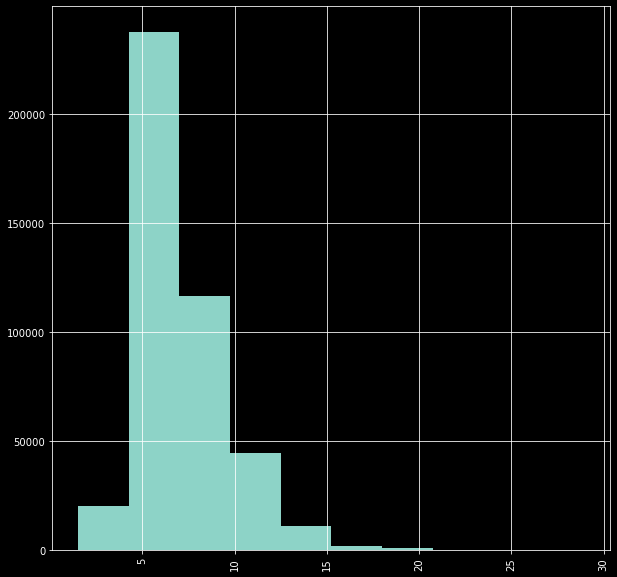

In [17]:
df_stratified['abv'].hist(figsize=(10,10), xrot=90);

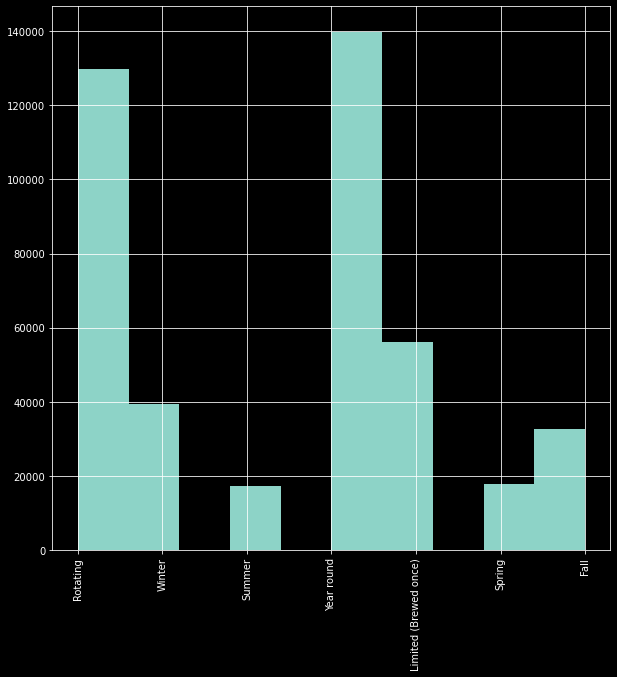

In [18]:
df_stratified['availability'].hist(figsize=(10,10), xrot=90);